## Perguntas a serem respondidas:  
### Ação combativa
- Qual o impacto do recebimento do SMS em cada grupo?
  - Geral
  - Problemas de saúde
  - Idade

### Ação paliativa
- Qual a faixa etária mais assídua e a mais ausente? 
- Qual(is) o(s) bairro(s) de pessoas menos assíduas? 
- Quais os problemas de saúde das pessoas menos assíduas? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('appointment_prediction_data.xlsx')

In [3]:
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MARIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTONIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARA','INHANGUET√Å':'INHAGUETA','UNIVERSIT√ÅRIO':'UNIVERSITARIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.drop_duplicates(subset='AppointmentID', keep='first')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56.0,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51.0,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21.0,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38.0,MARIA ORTIZ,0,0,0,0,0,1,1


In [4]:
attendance_percent = df['Compareceu'].mean()
attendance_percent

0.7981062284644533

In [5]:
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Percentual de comparecimento 

In [6]:
contagem_comparecimento = (df['Compareceu']==1).sum()
total_de_consultas = len(df['AppointmentID'])

foram_percent = (contagem_comparecimento/total_de_consultas)*100 
faltaram_percent = (100 - foram_percent)  

print(f'A assiduidade nas consultas foi de {foram_percent:.2f}%. Ausência de {faltaram_percent:.2f}%. ')

A assiduidade nas consultas foi de 79.81%. Ausência de 20.19%. 


### percentual de ausencia pelo sexo biológico, coluna 'Gender'


In [7]:
df.groupby('Gender')['Compareceu'].mean()

Gender
F    0.796883
M    0.800377
Name: Compareceu, dtype: float64

### percentual de ausencia entre os benificiários do bolsa família


In [8]:
# percentual de ausencia entre os benificiários do bolsa família
df.groupby('Scholarship')['Compareceu'].mean()

Scholarship
0    0.801970
1    0.762637
Name: Compareceu, dtype: float64

### percentual de ausência entre o grupo PCD


In [9]:
df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
#df['Handcap'].value_counts()

df.groupby('Handcap')['Compareceu'].mean() # bronze

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### percentual de ausência entre os pacientes com problemas com álcool


In [10]:
# percentual de ausência entre os alcoólótras
df.groupby('Alcoholism')['Compareceu'].mean()

Alcoholism
0    0.798094
1    0.798512
Name: Compareceu, dtype: float64

### percentual de ausência entre os diabéticos


In [11]:
# percentual de ausência entre os diabéticos
df.groupby('Diabetes')['Compareceu'].mean() # medalha de prata em assiduidade

Diabetes
0    0.796408
1    0.820035
Name: Compareceu, dtype: float64

### percentual de ausência entre os hipertensos


In [12]:
# percentual de ausência entre os hipertensos
df.groupby('Hipertension')['Compareceu'].mean() # campeões em assiduidade

Hipertension
0    0.791014
1    0.826968
Name: Compareceu, dtype: float64

### Percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS


In [13]:
# percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS
df.groupby('SMS_received')['Compareceu'].mean()

# percebe-se que quem recebe sms tende a faltar mais do que o grupo q não recebeu

SMS_received
0    0.833016
1    0.724282
Name: Compareceu, dtype: float64

## Faixa etária


In [14]:
#criar uma coluna de faixa etária
df['Faixa etaria']=pd.cut(df['Age'], bins=[-1,12,18,30,60,125], labels=['Crianças','Adolescentes','Adultons Jovens','Adultos','Idosos'])


In [15]:
# verifica criação de nova coluna faixa etária
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta,Faixa etaria
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Idosos
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Adultos
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,0,Idosos
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Crianças
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Adultos


 ### Qual a faixa etária mais assídua e a mais ausente? 

In [16]:
# agrupa em ordem decrescente a assiduidade por faixa etária
df.groupby('Faixa etaria')['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.847825
Adultos            0.804531
Crianças           0.795307
Adultons Jovens    0.752940
Adolescentes       0.739336
Name: Compareceu, dtype: float64

### qual faixa etária é mais acometida com problemas com álcool? 


In [17]:
df.groupby('Faixa etaria')['Alcoholism'].mean().sort_values(ascending=False)

Faixa etaria
Adultos            0.052093
Idosos             0.037221
Adultons Jovens    0.014747
Adolescentes       0.001916
Crianças           0.000619
Name: Alcoholism, dtype: float64

### qual faixa etária é mais acometida pelo diabetes? 


In [18]:
df.groupby('Faixa etaria')['Diabetes'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.221806
Adultos            0.075080
Adultons Jovens    0.006985
Adolescentes       0.004087
Crianças           0.000904
Name: Diabetes, dtype: float64

### qual faixa etária é mais acometida pelo hipertensão? 

In [19]:
df.groupby('Faixa etaria')['Hipertension'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.556743
Adultos            0.231158
Adultons Jovens    0.019285
Adolescentes       0.003704
Crianças           0.000571
Name: Hipertension, dtype: float64

# Bairros: 

### Qual(ais) bairros mais assíduos ? 

In [20]:
df.groupby('Neighbourhood')['Compareceu'].mean().sort_values(ascending=False)
# Os últimos são os bairros de pacientes com maior ausência em consultas

Neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MARIO CYPRESTE                 0.854447
SOLON BORGES                   0.853191
                                 ...   
ITARARA                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: Compareceu, Length: 82, dtype: float64

###  Qual(is) bairro(s) detém maior número de beneficiários do programa Bolsa família?


In [21]:
df.groupby('Neighbourhood')['Scholarship'].mean().sort_values(ascending=False)


Neighbourhood
SÃO BENEDITO                   0.280751
DO MOSCOSO                     0.268765
ILHA DO PRÍNCIPE               0.255516
PIEDADE                        0.254425
SANTOS REIS                    0.219378
                                 ...   
PARQUE INDUSTRIAL              0.000000
BARRO VERMELHO                 0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
MORADA DE CAMBURI              0.000000
AEROPORTO                      0.000000
Name: Scholarship, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de pacientes com problemas com álcool? 

In [22]:
df.groupby('Neighbourhood')['Alcoholism'].mean().sort_values(ascending=False)


Neighbourhood
ESTRELINHA           0.146840
DO MOSCOSO           0.130751
SANTA MARTHA         0.109869
DE LOURDE            0.083333
PRAIA DO SUÁ         0.079193
                       ...   
PARQUE INDUSTRIAL    0.000000
MORADA DE CAMBURI    0.000000
MONTE BELO           0.000000
MATA DA PRAIA        0.000000
AEROPORTO            0.000000
Name: Alcoholism, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de hipertensos? 

In [23]:
df.groupby('Neighbourhood')['Hipertension'].mean().sort_values(ascending=False)


Neighbourhood
DE LOURDE                      0.416667
DE LOURDES                     0.344710
SANTA CECÍLIA                  0.323661
PARQUE MOSCOSO                 0.320449
FONTE GRANDE                   0.312317
                                 ...   
ANTÔNIO HONÓRIO                0.018450
NAZARETH                       0.007407
ILHAS OCEÂNICAS DE TRINDADE    0.000000
ILHA DO FRADE                  0.000000
PARQUE INDUSTRIAL              0.000000
Name: Hipertension, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de diabéticos? 

df.groupby('Neighbourhood')['Diabetes'].mean().sort_values(ascending=False)


<h1>Resultados do envio de SMS</h1>
<h3>Introdução</h3>
O envio de SMS para lembrar os pacientes de consultas médicas pode ser uma forma eficaz de melhorar a adesão ao tratamento e, consequentemente, a saúde do paciente. Nesta apresentação, iremos analisar os resultados da nossa campanha de envio de SMS para pacientes em Vitória-ES que têm consultas agendadas.

<h3>Dados</h3>
Os dados utilizados neste projeto foram obtidos a partir da base de dados 'Brazil's Medical Appointment - Show/No Show' disponível em https://www.kaggle.com/datasets/sarvaninandipati/brazils-medical-appointment-show-or-no-show. Nele existe a coluna de SMS e podemos relacionar com a coluna de comparecimento para analisar a eficácia dos sms.

<h3>Processos</h3>
Inicialmente, os dados mostravam que o SMS diminuia a taxa de comparecimento. Notamos que as consultas marcadas e realizadas no mesmo dia puxavam a taxa de comparecimento muito pra cima(aproximadamente 95% de comparecimento), e que as pessoas só começavam a receber SMS a partir de 3 dias de diferença da data da marcação para a realização da consulta. Então decidimos isolar esse caso pra fazer o estudo somente em pacientes que tenham um tempo de marcação e realização de consulta maior que 3 dias.


In [48]:
df_3plus = df[df['time_delta'] > 3]
df_3plus.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta,Faixa etaria
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,0,4,Adolescentes
33,7.653517e+12,5616921,F,2016-04-25,2016-04-29,38.0,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,4,Adultos
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85.0,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,9,Idosos
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58.0,SÃO CRISTÓVÃO,0,1,0,1,0,1,1,4,Adultos
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27.0,GRANDE VITÓRIA,0,0,0,0,0,1,0,29,Adultons Jovens






<h3>Resultados</h3>
Os resultados mostram que a taxa de comparecimento dos pacientes que receberam o SMS foi 72,26%, enquanto a taxa de comparecimento dos pacientes que não receberam o SMS foi 66,65%.


In [49]:
df_3plus.groupby('SMS_received')['Compareceu'].mean().reset_index()

,SMS_received,Compareceu
0,0,0.666579
1,1,0.722640



Além disso, pudemos observar uma correlação entre o envio de SMS e a taxa de comparecimento dos pacientes. [Gráfico de barras ou outro tipo de gráfico que ilustre a correlação].


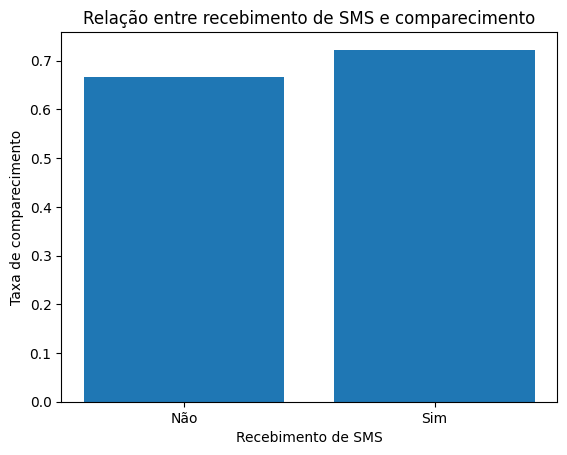

In [50]:
import matplotlib.pyplot as plt

sms_comparecimento = df_3plus.groupby('SMS_received')['Compareceu'].mean().reset_index()

plt.bar(sms_comparecimento['SMS_received'], sms_comparecimento['Compareceu'])
plt.xlabel('Recebimento de SMS')
plt.ylabel('Taxa de comparecimento')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.title('Relação entre recebimento de SMS e comparecimento')
plt.show()


A taxa de comparecimento aumenta em todas as faixas etárias, porém precisamos achar algo pra aliar ao sms e aumentar o comprometimento dos adolescentes e adultos jovens. E a taxa para crianças é a mais beneficiada pelo uso do SMS. Sendo assim, é necessário usar a estratégia para princilpamente Crianças, Adolescentes e Adultos jovens.

In [51]:
sms_by_age_show = df_3plus.groupby(['Faixa etaria', 'SMS_received'])['Compareceu'].mean().reset_index()
sms_by_age_show

,Faixa etaria,SMS_received,Compareceu
0,Crianças,0,0.632444
1,Crianças,1,0.711141
2,Adolescentes,0,0.598504
3,Adolescentes,1,0.642091
4,Adultons Jovens,0,0.609333
5,Adultons Jovens,1,0.644154
6,Adultos,0,0.673792
7,Adultos,1,0.735681
8,Idosos,0,0.757240
9,Idosos,1,0.806576


A taxa de comparecimento dos homens é mais afetada que a das mulheres com o uso do SMS, a porcentagem de homens que comparecem com o recebimento do SMS fica levemente maior que a das mulheres, note que os homens tem uma taxa de comparecimento menor no geral.

In [52]:
sms_received_by_gender = df_3plus.groupby(['Gender', 'SMS_received'])['Compareceu'].mean().reset_index()
sms_received_by_gender

,Gender,SMS_received,Compareceu
0,F,0,0.670870
1,F,1,0.720329
2,M,0,0.658625
3,M,1,0.727595


In [53]:
sms_received_by_gender = df_3plus.groupby(['Gender'])['Compareceu'].mean().reset_index()
sms_received_by_gender

,Gender,Compareceu
0,F,0.701301
1,M,0.698645





É importante ressaltar que, embora esses cálculos possam nos dar uma ideia geral da eficácia do SMS, há muitos outros fatores que podem influenciar a decisão de um paciente de comparecer a uma consulta, como a gravidade da condição médica, o acesso ao transporte, o nível socioeconômico, entre outros. Portanto, esses cálculos devem ser interpretados com cautela e considerando o contexto.

<h3>Conclusão</h3>
Com base nos resultados da nossa análise, podemos concluir que o envio de SMS é uma estratégia eficaz para melhorar a adesão dos pacientes a consultas médicas, sendo ainda mais recomendada para homens, adultos jovens, adolescentes e pais de crianças. Recomendamos que esta estratégia seja adotada por outras instituições médicas em todo o país para melhorar a saúde da população e reduzir os custos com tratamentos médicos desnecessários.

## Em comparação ao grupo não-PCD, o grupo com deficiência compareceu mais nas consultas.

In [30]:
df.groupby(['Handcap'])['Compareceu'].mean() 

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### Quantas consultas foram marcadas para cada especialidade?

In [31]:

df_pcd = df.loc[df['Handcap']==1]


hipertensos_pcd = df_pcd.loc[df_pcd['Hipertension']==1]
alcolismo_pcd = df_pcd.loc[df_pcd['Alcoholism']==1]
diabetes_pcd = df_pcd.loc[df_pcd['Diabetes']==1]

print(f'Foram {len(alcolismo_pcd)} consultas marcadas para Alcoolismo no grupo PCD')
print(f'Foram {len(diabetes_pcd)} consultas marcadas para Diabetes no grupo PCD')
print(f'Foram {len(hipertensos_pcd)} consultas marcadas para Hipertensão no grupo PCD')


Foram 78 consultas marcadas para Alcoolismo no grupo PCD
Foram 399 consultas marcadas para Diabetes no grupo PCD
Foram 968 consultas marcadas para Hipertensão no grupo PCD


### Qual gênero compareceu mais nas consultas marcadas no grupo PCD? Genero Masculino


In [32]:
df_pcd.groupby('Gender')['Compareceu'].mean()

Gender
F    0.811628
M    0.827731
Name: Compareceu, dtype: float64

### Qual a faixa etária que mais compareceu nas consultas marcadas?

In [33]:
df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])
df_pcd.groupby(['Faixa etaria'])['Compareceu'].mean().sort_values(ascending=False)

C:\Users\Mateus\AppData\Local\Temp\ipykernel_11292\3215571787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])


Faixa etaria
Adultos           0.837809
Idosos            0.835966
Jovens Adultos    0.798165
Adolescentes      0.769231
Crianças          0.622449
Name: Compareceu, dtype: float64

## No geral, incluindo TODAS as consultas, até as imediatas, receber o sms não impactou o grupo PCD, porém se isolarmos as consultas imediatas vemos que sim teve uma pequena diferença, e vamos ver isso mais a frente.

In [34]:
df_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.840563
1    0.748134
Name: Compareceu, dtype: float64

## Alocando as respostas de comparecimentos em grupos de:
### Recebeu o sms - 1. Não recebeu o sms - 0.<br>

## E separando o grupo por consultas realizadas a partir de 3 dias de marcação temos os seguintes resultados:

### No grupo de consultas marcadas para "Diabetes" houve um aumento de 7% no comparecimento de quem recebeu o lembrete por sms.

In [35]:

sms_diabetes_pcd = diabetes_pcd.loc[(diabetes_pcd['time_delta']>2)]
sms_diabetes_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.720000
1    0.791667
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Hipertensão" houve um aumento de 8% no comparecimento de quem recebeu o lembrete por sms. 

In [36]:

sms_hipertensao = hipertensos_pcd.loc[(hipertensos_pcd['time_delta']>2)]
sms_hipertensao.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.707547
1    0.777358
Name: Compareceu, dtype: float64

### No grupo de consultas marcadas para "Alcoolismo" receber SMS não fez diferença.


In [37]:
sms_alcolismo_pcd = alcolismo_pcd.loc[(alcolismo_pcd['time_delta']>2)]
sms_alcolismo_pcd.groupby(['SMS_received'])['Compareceu'].mean()

SMS_received
0    0.888889
1    0.882353
Name: Compareceu, dtype: float64

### Será que com o tempo mais longo de espera de consulta há mais ausência de deficientes? 
### O nível de comparecimento é alto nos primeiros dias, mas quanto mais longe da data a consulta é marcada, as taxas de comparecimento diminuem.

<Axes: title={'center': 'Comparecimento por tempo de espera pela consulta'}, xlabel='Dias depois da marcação'>

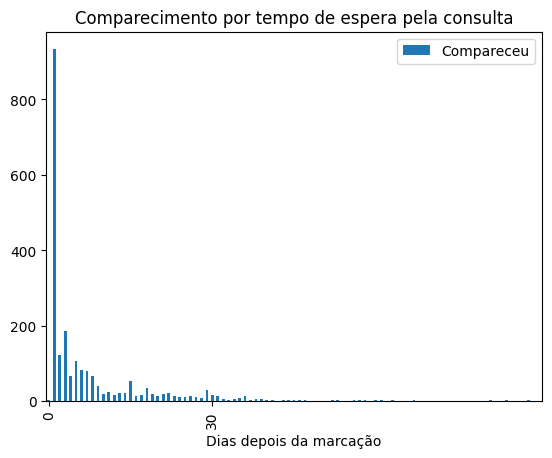

In [38]:
df_pcd.pivot_table(index='time_delta', aggfunc='count', values='Compareceu').plot(kind='bar', xticks= (np.arange(0,60,30)), title = 'Comparecimento por tempo de espera pela consulta', xlabel = 'Dias depois da marcação')

#### Solução: Quanto mais cedo as consultas forem marcadas, e tendo sido reforçados os lembretes por sms, a taxa de AUSÊNCIA do grupo PCD diminuirá.

# Data de agendamento:
O objetivo é avaliar a relação entra a data de agendamento e a assiduidade dos pacientes, visando criar um indicador para estabelecimento de um perfil propenso a não comparecer as consultas

In [39]:
df_aux = pd.read_excel('appointment_prediction_data.xlsx')
df_aux['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df_aux.rename(columns={'No-show': 'Compareceu'}, inplace=True)

In [40]:
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27T09:24:46Z,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1
110569,3.134163e+12,5768536,F,2016-06-03T07:42:27Z,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1
110570,6.846652e+12,5768917,M,2016-06-03T08:10:22Z,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1
110571,8.222960e+11,5772302,F,2016-06-03T15:06:15Z,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1


In [41]:
df_aux['ScheduledDay'] = pd.to_datetime(df_aux['ScheduledDay'])
df_aux['ScheduledDay_aux'] = pd.to_datetime(df_aux['ScheduledDay']).dt.date
df_aux['AppointmentDay_aux'] = pd.to_datetime(df_aux['AppointmentDay']).dt.date
df_aux['time_delta'] = (df_aux['AppointmentDay_aux'] - df_aux['ScheduledDay_aux']).dt.days
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4


In [42]:
#Extração da hora em que foi agendada a consulta
df_aux['ScheduledHour'] = df_aux.ScheduledDay.dt.strftime("%H")
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta,ScheduledHour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37,09
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,07
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,08
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4,15


Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no perído da manhã foram as mais assíduas

<Axes: xlabel='ScheduledHour'>

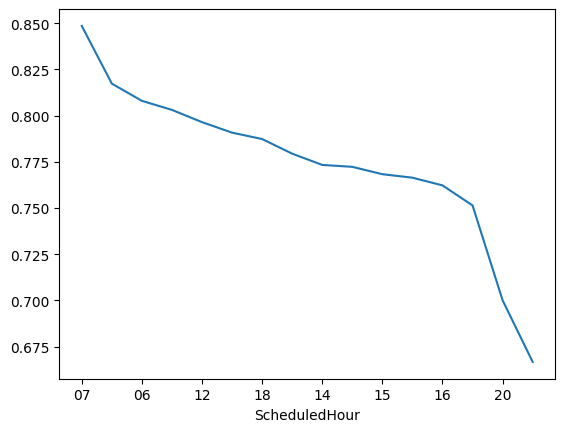

In [43]:
#Verificação da assiduidade por hora
df_aux.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no sábado foram as mais assíduas

<Axes: xlabel='ScheduledWeekDay'>

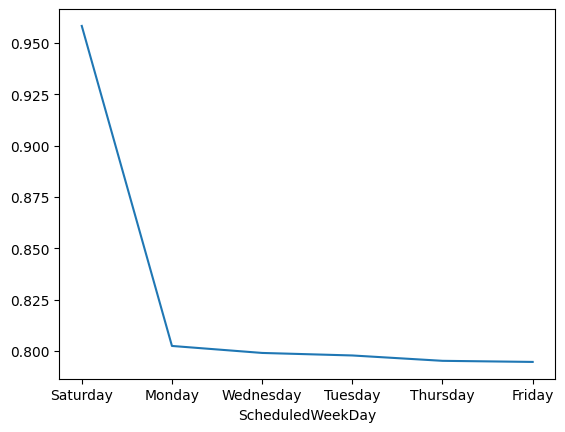

In [44]:
#Extração do dia da semana que foram realizadas os agendamentos
df_aux['ScheduledWeekDay'] = df_aux.ScheduledDay.dt.day_name()
df_aux.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()

Afim de validar se o comportamento se repete desocnsiderando possíveis casos de emergências (consultas agendadas e realizadas no mesmo dia), refizemos a análise eliminando esses casos e podemos notar que o mesmo se repete

In [45]:
df_filtrado = df_aux[df_aux.time_delta > 0].copy()

<Axes: xlabel='ScheduledHour'>

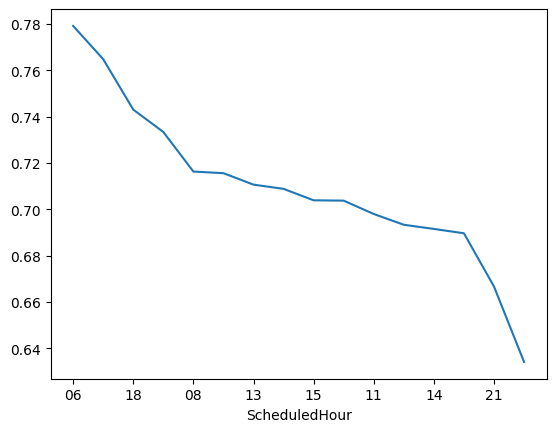

In [46]:
#Extração da hora em que foi agendada a consulta
df_filtrado['ScheduledHour'] = df_filtrado.ScheduledDay.dt.strftime("%H")
df_filtrado.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

<Axes: xlabel='ScheduledWeekDay'>

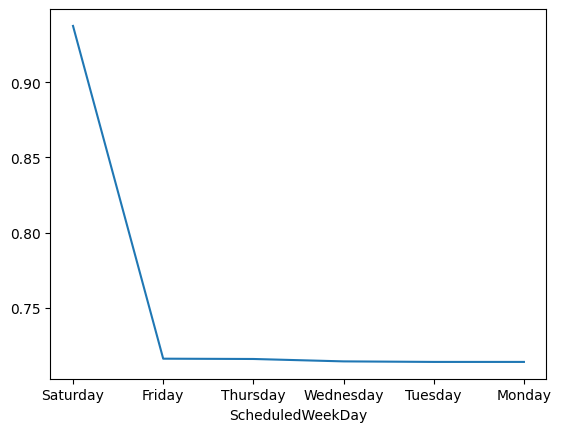

In [47]:
df_filtrado['ScheduledWeekDay'] = df_filtrado.ScheduledDay.dt.day_name()
df_filtrado.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()